In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#add other imports as needed

In [7]:
import os

In [27]:
import platform

# Set file location based on platform. 
platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/TReND2024/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on Code Ocean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/TReND2024/"

In [28]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = os.path.join(data_root,'allen-brain-observatory/visual-coding-2p/manifest.json')

boc = BrainObservatoryCache(manifest_file=manifest_file)

Use code below to access Neuropixels data set. This is electrophysiological data. It is very similar to the data set we demonstrated, but has important differences, both in the science and in the access methods used in the python tools.

In [25]:
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

manifest_path = os.path.join(data_root,'allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json') 

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [26]:
areas = boc.get_all_targeted_structures()
areas

['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']

In [12]:
cre_lines = boc.get_all_cre_lines()
cre_lines

['Cux2-CreERT2',
 'Emx1-IRES-Cre',
 'Fezf2-CreER',
 'Nr5a1-Cre',
 'Ntsr1-Cre_GN220',
 'Pvalb-IRES-Cre',
 'Rbp4-Cre_KL100',
 'Rorb-IRES2-Cre',
 'Scnn1a-Tg3-Cre',
 'Slc17a7-IRES2-Cre',
 'Sst-IRES-Cre',
 'Tlx3-Cre_PL56',
 'Vip-IRES-Cre']

In [13]:
#create an empty dataframe with colums as areas and index as cre_lines
df = pd.DataFrame(columns=areas,index=cre_lines)

#populate the dataframe with the number of experiment containers for each combination
for cre in cre_lines:
    for area in areas:
        exps = boc.get_experiment_containers(targeted_structures=[area],cre_lines=[cre])
        df[area].loc[cre] =len(exps)

#look at dataframe
df

,VISal,VISam,VISl,VISp,VISpm,VISrl
Cux2-CreERT2,13,11,11,16,13,12
Emx1-IRES-Cre,7,3,8,10,4,9
Fezf2-CreER,0,0,5,4,0,0
Nr5a1-Cre,6,6,6,8,7,6
Ntsr1-Cre_GN220,0,0,7,6,5,0
Pvalb-IRES-Cre,0,0,5,16,0,0
Rbp4-Cre_KL100,6,8,7,7,6,4
Rorb-IRES2-Cre,6,8,6,8,7,5
Scnn1a-Tg3-Cre,0,0,0,9,0,0
Slc17a7-IRES2-Cre,2,2,19,60,15,2


In [14]:
visual_area = areas[3]

In [15]:
exps = boc.get_experiment_containers(targeted_structures=[visual_area])
pd.DataFrame(exps)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed
0,803589437,175,VISp,Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),425496,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93-425496,[],False
1,661437138,175,VISp,Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),365251,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93-365251,[],False
2,511510736,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,[],False
3,603576130,550,VISp,Ntsr1-Cre_GN220,Ai148(TIT2L-GC6f-ICL-tTA2),323982,Ntsr1-Cre_GN220;Ai148-323982,[],False
4,670396939,195,VISp,Pvalb-IRES-Cre,Ai162(TIT2L-GC6s-ICL-tTA2),369497,Pvalb-IRES-Cre;Ai162-369497,[],False
...,...,...,...,...,...,...,...,...,...
211,814796612,375,VISp,Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),412366,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93-412366,[],False
212,1018027599,225,VISp,Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),449653,Vip-IRES-Cre;Ai148-449653,[],False
213,957366099,375,VISp,Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),476631,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93-476631,[],False
214,527676429,275,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),237706,Emx1-IRES-Cre;Camk2a-tTA;Ai93-237706,[Epileptiform Events],False


In [16]:
experiment_container_ids = [exps[120]['id']]

In [17]:
sessions = boc.get_ophys_experiments(experiment_container_ids=experiment_container_ids, stimuli=['natural_scenes'])

In [18]:
session_id = sessions[0]['id']
session_id

645035917

In [19]:
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

In [20]:
cell_ids = data_set.get_cell_specimen_ids()
cell_ids.shape

(60,)

In [21]:
# get the stimulus table for the natural scenes stimulus
stim_table = data_set.get_stimulus_table('natural_scenes')

In [22]:
# get trial-to-trial dff traces
timestamps, dff = data_set.get_dff_traces()
dff.shape

(60, 113849)

In [85]:
timestamps.shape

(113849,)

In [23]:
stim_start = stim_table.start.min()
stim_end = stim_table.end.max()
dff = dff[:, stim_start:stim_end]
dff.shape

(60, 79994)

In [91]:
ts=timestamps[stim_start:stim_end]
ts

array([ 545.84129,  545.87454,  545.90779, ..., 3205.40105, 3205.4343 ,
       3205.46755])

In [94]:
len(ts)

79994

In [95]:
ts[len(ts)-1]- ts[0]

2659.62626

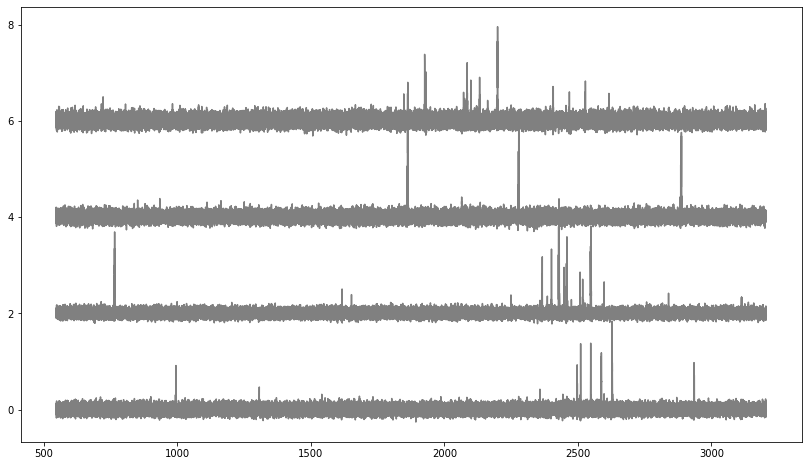

In [89]:
fig = plt.figure(figsize=(14,8))
for i in range(4):
    plt.plot(ts,dff[i,:]+(i*2), color='gray')

In [57]:
dff_thresh = np.where(dff>0.3, dff, 0)

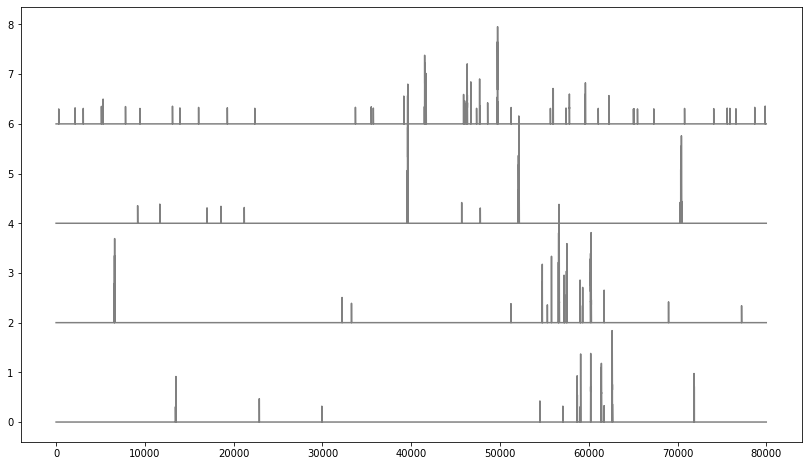

In [58]:
fig = plt.figure(figsize=(14,8))
for i in range(4):
    plt.plot(dff_thresh[i,:]+(i*2), color='gray')

In [64]:
spike_train = np.where(dff>0.3, 1, 0)
print(spike_train.shape)

(60, 79994)


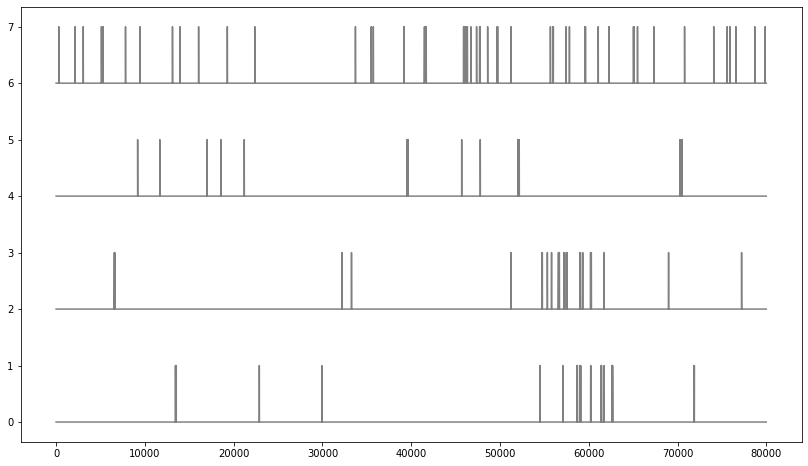

In [66]:
#spike_rate = no_of_spikes/duration
fig = plt.figure(figsize=(14,8))
for i in range(4):
    plt.plot(spike_train[i,:]+(i*2), color='gray')

NameError: name 'stim_epoch' is not defined

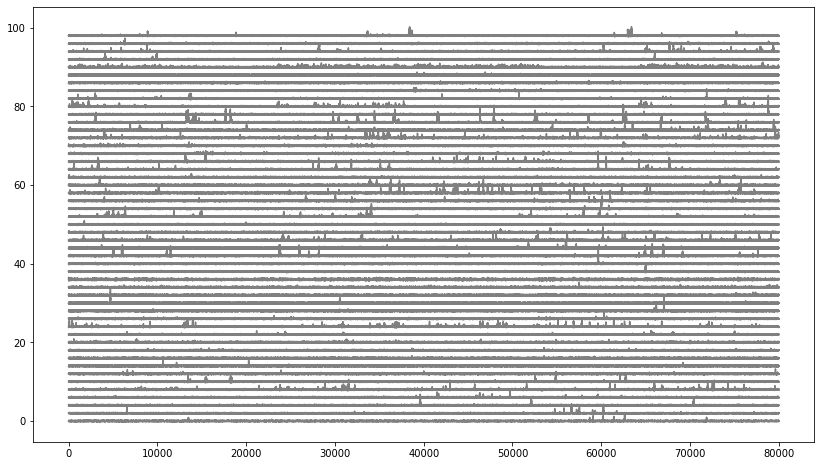

In [119]:
fig = plt.figure(figsize=(14,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)
        
plt.xlabel("Acquisition frames")

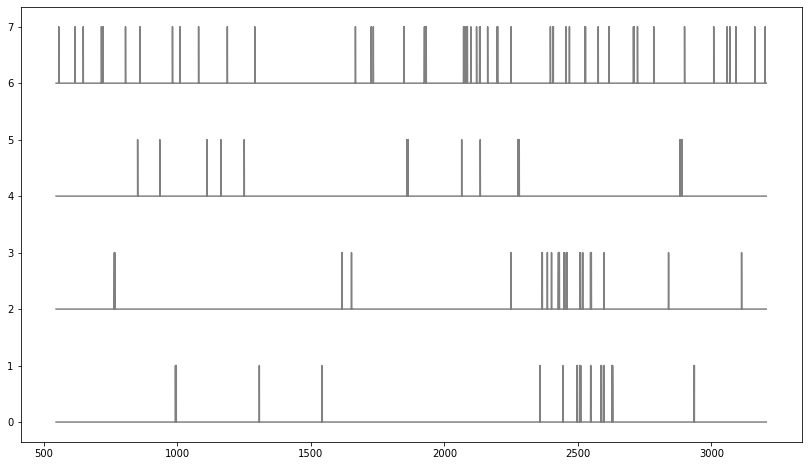

In [90]:
#spike_rate = no_of_spikes/duration
fig = plt.figure(figsize=(14,8))
for i in range(4):
    plt.plot(ts,spike_train[i,:]+(i*2), color='gray')

In [67]:
no_of_spikes = np.sum(spike_train, axis=0)
print(no_of_spikes)

[ 262  400  324  345  868  575   95   87   68  170  404  312 2142  152
  133  143  137  281  523   67   78 1529  357 1654  182   31 1337  158
  445 1854  433  103  941  700  370  362 1599  971 2991  116 1517  274
  220  133  172 2277  296 1021   99  694  308 1415   52  278  365 1754
 1458 1939  829  243]


In [96]:
session_duration = ts[len(ts)-1]- ts[0]
spike_rate = no_of_spikes/session_duration
print(spike_rate)

[0.09851008 0.15039707 0.12182163 0.12971747 0.32636164 0.21619579
 0.0357193  0.03271136 0.0255675  0.06391876 0.15190104 0.11730972
 0.80537632 0.05715089 0.05000703 0.05376695 0.051511   0.10565394
 0.19664417 0.02519151 0.02932743 0.5748928  0.13422939 0.62189189
 0.06843067 0.01165577 0.50270221 0.05940684 0.16731674 0.69709043
 0.16280483 0.03872725 0.35380911 0.26319487 0.13911729 0.13610935
 0.60121229 0.36508889 1.1245941  0.04361515 0.57038089 0.10302199
 0.08271839 0.05000703 0.06467074 0.85613533 0.11129383 0.38388852
 0.03722328 0.26093892 0.11580574 0.53202964 0.01955162 0.10452596
 0.13723733 0.65949116 0.54819732 0.7290498  0.31169793 0.09136622]


In [97]:
type(spike_rate)

numpy.ndarray

In [98]:
spike_rate.mean()

0.244664702124977

In [99]:
spike_rate.std()

0.255717409708268

In [104]:
spike_rate.ptp()

1.112938326906127

In [106]:
spike_rate.min()

0.011655773018273627

In [107]:
spike_rate.max()

1.1245940999244006

In [118]:
array = spike_rate
print(np.median(array))

0.13197342998109818


In [109]:
import matplotlib.pyplot as plt

(array([29., 11.,  4.,  3.,  3.,  5.,  2.,  2.,  0.,  1.]),
 array([0.01165577, 0.12294961, 0.23424344, 0.34553727, 0.4568311 ,
        0.56812494, 0.67941877, 0.7907126 , 0.90200643, 1.01330027,
        1.1245941 ]),
 <BarContainer object of 10 artists>)

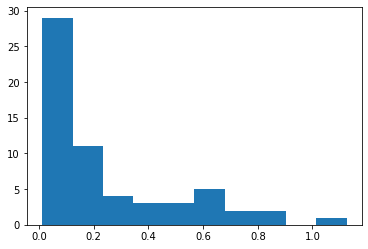

In [110]:
plt.hist(spike_rate)

In [113]:
`spike_rate.median()

SyntaxError: invalid syntax (<ipython-input-113-a773242ee354>, line 1)